In [165]:
import tucu_saltena_fun as fu
import di_python.ya_esta as ye
import importlib
import os
importlib.reload(fu);
import wrf
import netCDF4

In [2]:
PY_ID = fu.get_py_id()
print(PY_ID)

mac_diego


In [153]:
if PY_ID=='taito_diego':
    TMP_DIR = '/tmp/aliagadi'
    dir_path = '../tucu-april-data/WRF/'
    plot_path = '../tucu-april-data/plots/vert_w'
if PY_ID=='mac_diego':
    TMP_DIR = '/tmp/wrf_tmp'
    dir_path = '../tucu-april-rm-data/WRF/'
    plot_path = '/tmp/wrf_tmp/plots/vert_w'

In [154]:

file_list = fu.get_file_list(dir_path, ext='wrfout')

In [155]:
def pickel_the_thing():
    dd=['d01','d02','d03','d04']
    mega_l={}
    for d in dd:
        mega_l[d]=fu.get_mega_list(d,file_list)
    return mega_l
# mega_l = pickel_the_think()

In [156]:
import pickle as pk
pk_path = './mega_l.pickle'
# pk.dump(mega_l,open(pk_path,'wb'))
mega_l = pk.load(open(pk_path,'rb'))

In [157]:
row = file_list.iloc[188]
print(row)

name                       wrfout_d04_2018-04-07_19:30:00
path    ../tucu-april-rm-data/WRF/wrfout_d04_2018-04-0...
dom                                                   d04
Name: 188, dtype: object


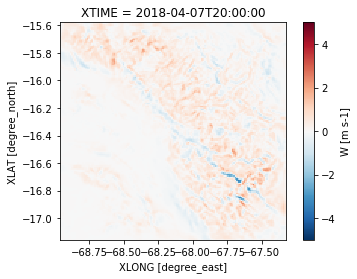

In [158]:
vm = -5
vM = 5
f_i = 188
row = file_list.iloc[f_i]
ds = xr.open_dataset(row.path)
ds1 = ds.isel(Time=2,bottom_top_stag=0)
fig, ax = plt.subplots()
img = ds1.W.plot(x='XLONG',y='XLAT',vmin=vm,vmax=vM,cmap='RdBu_r',ax=ax)
ax.set_aspect('equal')

In [ ]:
min_since_run = int(nds3.XTIME.values)
fig, ax = plt.subplots()
# nds3.plot.imshow()
# vm=min(fu_.get_fun(xr.DataArray.min))
# vM=max(fu_.get_fun(xr.DataArray.max))
m1 = nds3.plot(x='XLONG', y='XLAT', ax=ax, add_colorbar=False, vmin=vm, vmax=vM)
nds4.plot(x='XLONG', y='XLAT', ax=ax, add_colorbar=False, vmin=vm, vmax=vM)
fig.set_size_inches(10, 7)
cb = fig.colorbar(m1)
cb.set_label(cb_legend)

gb = wrf.geo_bounds(nds4)

lam = gb.bottom_left.lat
lom = gb.bottom_left.lon
laM = gb.top_right.lat
loM = gb.top_right.lon

lad = laM - lam
lod = loM - lom
lap = lad * par
lop = lod * par

ax.set_ylim(lam - lap, laM + lap)
ax.set_xlim(lom - lop, loM + lop)
ax.set_title(
    '{} | t = {}\n din={} | dout={}'.format(
        ye.dt64_2_iso(nds3.Time.values),
        min_since_run
        , d3, d4
    )
)
ax.scatter(*ye.LOLA_CHC, c='r')
ax.scatter(*ye.LOLA_LPZ, c='b')
ax.set_aspect('equal')
plt.close(fig)

In [161]:
d_pairs = [
    {'d3':'d01','d4':'d02','par':.2},
    {'d3':'d02','d4':'d03','par':.2},
    {'d3':'d03','d4':'d04','par':.5},
    ]

In [163]:
iind = len(mega_l['d01'])
di = 3

2018-04-05T06:00:00
w_d01-d02_t-2018-04-05T06:00:00.png
/tmp/wrf_tmp/plots/vert_w/d01-d02
/tmp/wrf_tmp/plots/vert_w/d01-d02/w_d01-d02_t-2018-04-05T06:00:00.png
2018-04-05T06:00:00
w_d02-d03_t-2018-04-05T06:00:00.png
/tmp/wrf_tmp/plots/vert_w/d02-d03
/tmp/wrf_tmp/plots/vert_w/d02-d03/w_d02-d03_t-2018-04-05T06:00:00.png
2018-04-05T06:00:00
w_d03-d04_t-2018-04-05T06:00:00.png
/tmp/wrf_tmp/plots/vert_w/d03-d04
/tmp/wrf_tmp/plots/vert_w/d03-d04/w_d03-d04_t-2018-04-05T06:00:00.png
2018-04-05T06:15:00
w_d01-d02_t-2018-04-05T06:15:00.png
/tmp/wrf_tmp/plots/vert_w/d01-d02
/tmp/wrf_tmp/plots/vert_w/d01-d02/w_d01-d02_t-2018-04-05T06:15:00.png
2018-04-05T06:15:00
w_d02-d03_t-2018-04-05T06:15:00.png
/tmp/wrf_tmp/plots/vert_w/d02-d03
/tmp/wrf_tmp/plots/vert_w/d02-d03/w_d02-d03_t-2018-04-05T06:15:00.png
2018-04-05T06:15:00
w_d03-d04_t-2018-04-05T06:15:00.png
/tmp/wrf_tmp/plots/vert_w/d03-d04
/tmp/wrf_tmp/plots/vert_w/d03-d04/w_d03-d04_t-2018-04-05T06:15:00.png
2018-04-05T06:30:00
w_d01-d02_t-2018-04-

KeyboardInterrupt: 

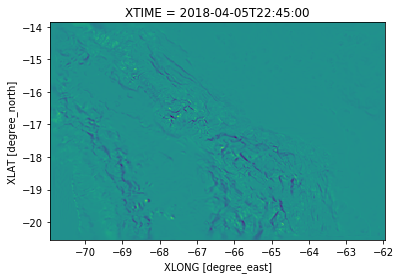

In [174]:
importlib.reload(fu);
for ind in range(iind):
    for dic_i in range(di):
        fu.save_plots_double_domain_w(
           dic_i    =dic_i    ,      
           ind      =ind      ,       
           plot_path=plot_path, 
           d_pairs  =d_pairs  ,  
           mega_l   =mega_l   , 
        )